# Neural Network from scratch

## Import packages

Set src directory to the path where the NeuralNetwork.py file is located.

In [1]:
import sys
import os

# Add the 'src' directory to the Python path
src_dir = os.path.join(os.path.dirname(os.getcwd()), 'src')
sys.path.append(src_dir)

In [2]:
from NeuralNetwork import Neural_Network
from GD_class import GradientDescent
from cost_functions import Cost_Functions
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
import seaborn as sns

## Initiate neural network

1. Set up the design matrix with the inputs as discussed above and a vector containing the output, the so-called targets. Note that the design matrix is the same for all gates. You need just to define different outputs.

In [3]:
def grad_cost_logreg(target, pred):
    
    return (pred - target)/(pred * (1 - pred))

In [4]:
np.random.seed(1234)

# Create design matrix
X = jnp.array([[0, 0],
               [0, 1],
               [1, 0],
               [1, 1]])

# The XOR gate
target_XOR = jnp.array( [ 0, 1 ,1, 0])
# The OR gate
target_OR = jnp.array( [ 0, 1 ,1, 1])
# The AND gate
target_AND = jnp.array( [ 0, 0 ,0, 1])

target = target_AND.reshape(len(target_AND), 1)  # Needs to be of shape (n_inputs, 1) for grad_cost_logreg to work


2. Construct a neural network with only one hidden layer and two hidden nodes using the Sigmoid function as activation function.

In [5]:
n_hidden_layers = 1
n_hidden_nodes = 2
n_outputs = 1
learning_rate=0.1
n_features = X.shape[1]  # Is called n_inputs in class, should probably be features

ffnn = Neural_Network(n_features, n_hidden_layers, n_hidden_nodes, n_outputs, 
                      grad_cost_function=grad_cost_logreg,
                      learning_rate=learning_rate, activation_function_hidden='sigmoid',
                      activation_function_output='sigmoid',
                      optimizer=None,
                      classification_problem=True)

str(ffnn)

'Neural Network with 1 hidden layers and [2] nodes per layer. The activation function for hidden layers is sigmoid.The activation function for the output layer is sigmoid.'

3. Set up the output layer with only one output node and use again the Sigmoid function as activation function for the output.

In [6]:
print(f'Output layer has {ffnn.output_layer.n_nodes} node and uses the {str(ffnn.output_layer.activation_function)} as activation function')

Output layer has 1 node and uses the sigmoid as activation function


4. Initialize the weights and biases and perform a feed forward pass and compare the outputs with the targets.

In [7]:
print('Weights hidden layer 1:\n'
      f'{ffnn.hidden_layers[0].weights}')
print('Biases hidden layer 1:\n'
      f'{ffnn.hidden_layers[0].biases}')

print('weights output layer:\n'
      f'{ffnn.output_layer.weights}')
print('Biases output layer:\n'
      f'{ffnn.output_layer.biases}')

Weights hidden layer 1:
[[ 0.04714352 -0.11909757]
 [ 0.1432707  -0.03126519]]
Biases hidden layer 1:
[[0. 0.]]
weights output layer:
[[-0.07205887]
 [ 0.08871629]]
Biases output layer:
[[0.]]


In [8]:
ffnn.feed_forward(X)

print("Final prediction before training:\n"
      f"{ffnn.output_layer.output}")

Final prediction before training:
[[0.50208217]
 [0.5012647 ]
 [0.5012103 ]
 [0.500395  ]]


5. Set up the cost function (cross entropy for classification of binary cases).

6. Calculate the gradients needed for the back propagation part.

7. Use the gradients to train the network in the back propagation part. Think of using automatic differentiation.

In [9]:
ffnn.feed_backward(X, target)

print('Weights and biases after one backward propagation: \n')

print('Weights hidden layer 1:\n'
      f'{ffnn.hidden_layers[0].weights}')
print('Biases hidden layer 1:\n'
      f'{ffnn.hidden_layers[0].biases}')

print('weights output layer:\n'
      f'{ffnn.output_layer.weights}')
print('Biases output layer:\n'
      f'{ffnn.output_layer.biases}')


Weights and biases after one backward propagation: 

Weights hidden layer 1:
[[ 0.14713399 -0.21908052]
 [ 0.24325529 -0.13125482]]
Biases hidden layer 1:
[[ 0.09999995 -0.09999996]]
weights output layer:
[[-0.17205888]
 [-0.01128371]]
Biases output layer:
[[-0.1]]


8. Train the network and study your results and compare with results obtained either with scikit-learn or TensorFlow.

In [10]:
ffnn.train(X, target, num_iter=100)

print('Weights and biases after training: \n')

print('Weights hidden layer 1:\n'
      f'{ffnn.hidden_layers[0].weights}')
print('Biases hidden layer 1:\n'
      f'{ffnn.hidden_layers[0].biases}')

print('weights output layer:\n'
      f'{ffnn.output_layer.weights}')
print('Biases output layer:\n'
      f'{ffnn.output_layer.biases}')

print("\nFinal prediction after training:\n"
      f"{ffnn.output_layer.output}")


Weights and biases after training: 

Weights hidden layer 1:
[[-4.064101  -4.9692655]
 [-4.0501413 -4.9768233]]
Biases hidden layer 1:
[[5.145253  6.5612745]]
weights output layer:
[[-4.7446074]
 [-5.5868053]]
Biases output layer:
[[3.4267898]]

Final prediction after training:
[[0.00105916]
 [0.00865036]
 [0.00870959]
 [0.95216024]]


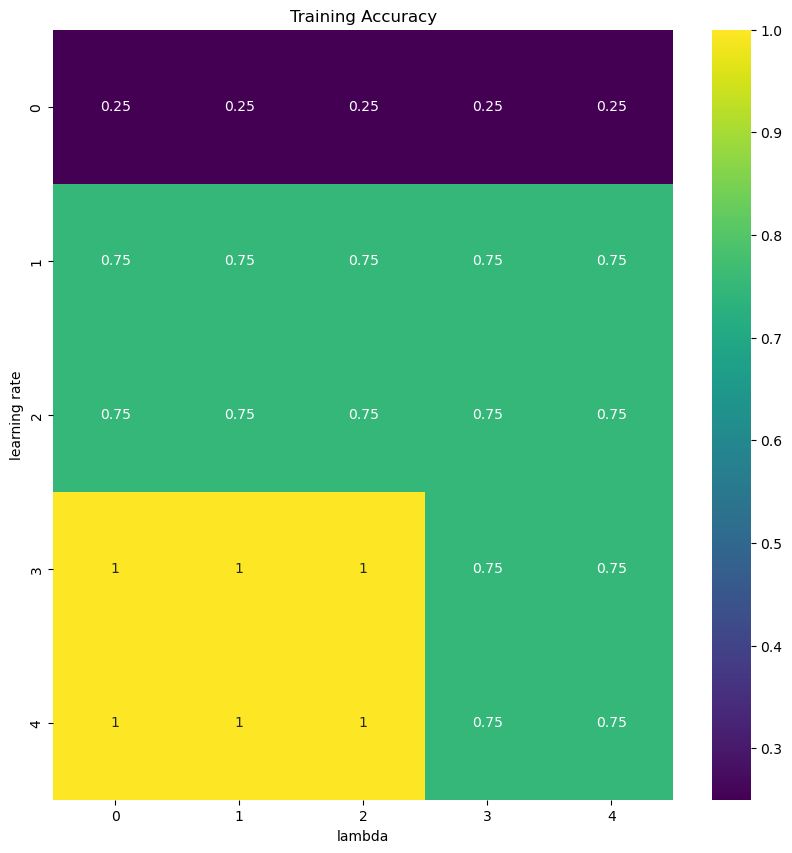

In [11]:
# Using and gate

target = target_AND.reshape(len(target_AND), 1)

learning_rates = np.logspace(-4, 0, 5)
lmbd_vals = np.logspace(-4, 0, 5)

accuracy = np.zeros((len(learning_rates), len(lmbd_vals)))

for i, lr in enumerate(learning_rates):
    for j, lmbd in enumerate(lmbd_vals):
        
        #optimizer = GradientDescent(learning_rate=lr)
        
        ffnn = Neural_Network(n_features, n_hidden_layers, n_hidden_nodes, n_outputs, 
                              grad_cost_function=grad_cost_logreg,
                              learning_rate=lr, 
                              lmbd=lmbd, 
                              activation_function_hidden='sigmoid',
                              activation_function_output='sigmoid',
                              optimizer=None,
                              classification_problem=True)
        
        ffnn.train(X, target, num_iter=100)
        pred = ffnn.predict(X)

        accuracy[i][j] = accuracy_score(target_AND, pred)
        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("learning rate")
ax.set_xlabel("lambda")
plt.show()

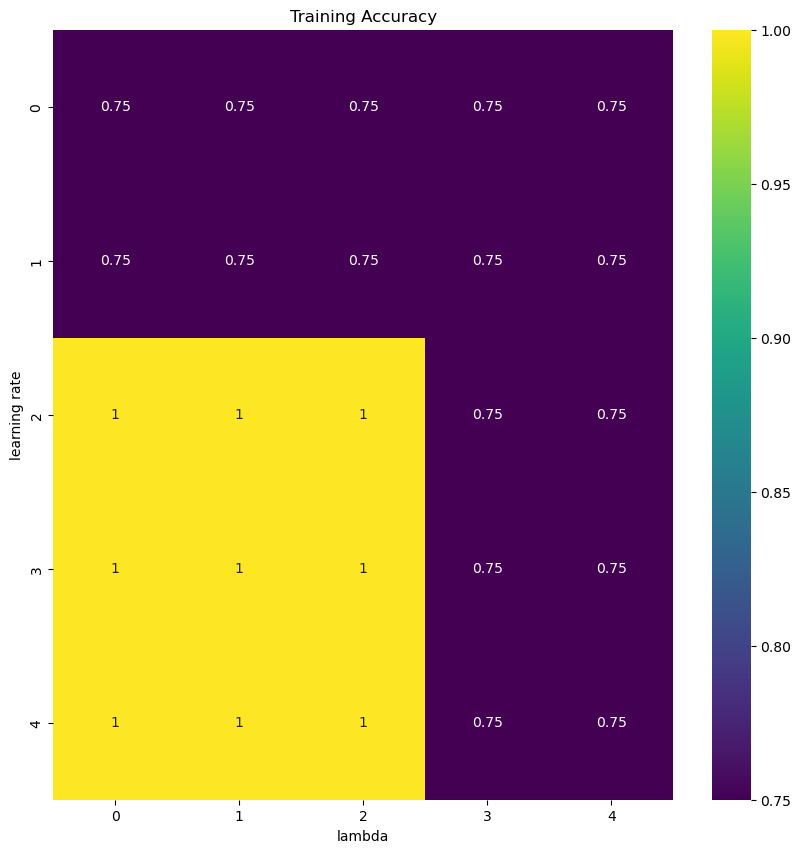

In [15]:
# Using or gate

target = target_OR.reshape(len(target_OR), 1)

learning_rates = np.logspace(-4, 0, 5)
lmbd_vals = np.logspace(-4, 0, 5)

accuracy = np.zeros((len(learning_rates), len(lmbd_vals)))

for i, lr in enumerate(learning_rates):
    for j, lmbd in enumerate(lmbd_vals):
        
        optimizer = GradientDescent(learning_rate=lr)
        
        ffnn = Neural_Network(n_features, n_hidden_layers, n_hidden_nodes, n_outputs, 
                              grad_cost_function=grad_cost_logreg,
                              learning_rate=lr, 
                              lmbd=lmbd, 
                              activation_function_hidden='sigmoid',
                              activation_function_output='sigmoid',
                              optimizer=None,
                              classification_problem=True)
        
        ffnn.train(X, target, num_iter=1000)
        pred = ffnn.predict(X)

        accuracy[i][j] = accuracy_score(target_OR, pred)
        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("learning rate")
ax.set_xlabel("lambda")
plt.show()

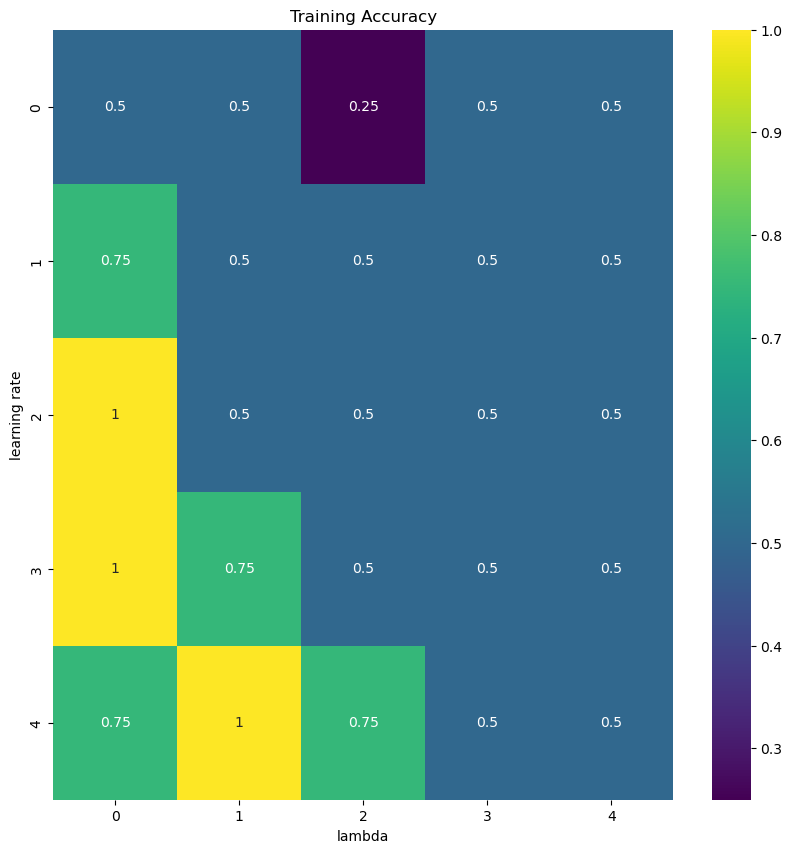

In [18]:
# Using xor gate

target = target_XOR.reshape(len(target_XOR), 1)

learning_rates = np.logspace(-4, 0, 5)
lmbd_vals = np.logspace(-4, 0, 5)

accuracy = np.zeros((len(learning_rates), len(lmbd_vals)))

for i, lr in enumerate(learning_rates):
    for j, lmbd in enumerate(lmbd_vals):
        
        optimizer = GradientDescent(learning_rate=lr)
        
        ffnn = Neural_Network(n_features, n_hidden_layers, n_hidden_nodes, n_outputs, 
                              grad_cost_function=grad_cost_logreg,
                              learning_rate=lr, 
                              lmbd=lmbd, 
                              activation_function_hidden='sigmoid',
                              activation_function_output='sigmoid',
                              optimizer=None,
                              classification_problem=True)
        
        ffnn.train(X, target, num_iter=1000)
        pred = ffnn.predict(X)

        accuracy[i][j] = accuracy_score(target_XOR, pred)
        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("learning rate")
ax.set_xlabel("lambda")
plt.show()